In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from queso.utils.io import IO

In [4]:
io = IO(folder=r"2023-01-16_cfi-qfi-batch_6415")
df = io.load_dataframe(filename="batch")
df

16/01/2023, 22:22:05 | Loaded from C:\Users\benma\OneDrive - University of Waterloo\Backups\Desktop (BACKUP)\1 - Projects\Quantum Intelligence Lab\qsense\data\2023-01-16_cfi-qfi-batch_6415\batch.pkl successfully.


,n,d,run,n_layers,lr,n_steps,loss,max,device,fi
0,2,2,0,8,0.025,400,"[0.7737296971333472, 1.7262079012564957, 1.933...",3.9319134353151246,Tesla P100-PCIE-12GB,cfi
1,2,2,1,8,0.025,400,"[0.386377454287171, 0.5074404781551768, 0.6521...",3.9634916125217163,Tesla P100-PCIE-12GB,cfi
2,2,2,2,8,0.025,400,"[0.15220584543845753, 0.30144685266280963, 0.4...",3.945020031824061,Tesla P100-PCIE-12GB,cfi
3,2,2,0,8,0.025,400,"[0.5500630546782342, 0.8961338210333257, 1.134...",3.9986679994564924,Tesla P100-PCIE-12GB,qfi
4,2,2,1,8,0.025,400,"[0.03694386937375904, 0.06289958065998974, 0.1...",3.5181099716240793,Tesla P100-PCIE-12GB,qfi
5,2,2,2,8,0.025,400,"[0.4513071957935494, 1.0805547612404947, 1.211...",3.771752342233172,Tesla P100-PCIE-12GB,qfi
6,4,2,0,8,0.025,400,"[0.5141685115132152, 0.7313290517091748, 1.005...",13.708327037038446,Tesla P100-PCIE-12GB,cfi
7,4,2,1,8,0.025,400,"[0.4875488407200196, 0.65628242445622, 0.82398...",14.778201673869464,Tesla P100-PCIE-12GB,cfi
8,4,2,2,8,0.025,400,"[1.0052777915835573, 1.1467640701464688, 1.565...",13.76478888090973,Tesla P100-PCIE-12GB,cfi
9,4,2,0,8,0.025,400,"[1.2217011320657925, 2.008225113620078, 2.5354...",15.656924717252181,Tesla P100-PCIE-12GB,qfi


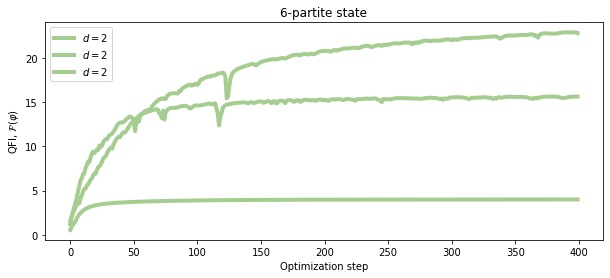

In [7]:
fig, ax = plt.subplots(1, 1, figsize=[10, 4], sharey=True)
colors = lambda x: sns.color_palette("crest", as_cmap=True)((x - 2) / (4 - 2))
for i, n in enumerate(df.n.unique()):
    for d in df.d.unique():
        dfi = df[(df.d == d) & (df.n == n) & (df.fi == "qfi")]
        ax.plot(
            dfi.loss.iloc[0],
            label=f"$d={d}$",
            **dict(
                color=colors(d),
                ls="-",
                lw=4,
                alpha=1.0,
            ),
        )
    ax.legend()
ax.set(xlabel="Optimization step", title=f"{n}-partite state")
ax.set(ylabel=r"QFI, $\mathcal{F}(\varphi)$")
plt.show()

In [35]:
io.save_figure(fig, filename="qfi_n-partite_qudit")

10/12/2022, 21:40:58 | Saved figure to C:\Users\benma\OneDrive - University of Waterloo\Backups\Desktop (BACKUP)\1 - Projects\Quantum Intelligence Lab\qsense\data\2022-12-08_qfi-batch-optimization_dDD9\qfi_n-partite_qudit successfully.


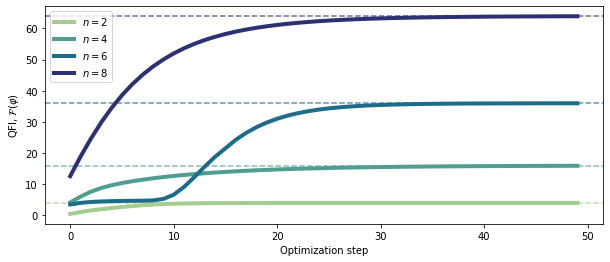

10/12/2022, 21:39:35 | Saved figure to C:\Users\benma\OneDrive - University of Waterloo\Backups\Desktop (BACKUP)\1 - Projects\Quantum Intelligence Lab\qsense\data\2022-12-09_qfi-batch-optimization_57f8\qubit_qfi_plateau successfully.


In [32]:
fig, axs = plt.subplots(1, 1, figsize=[10, 4])
# colors = sns.color_palette("Paired")
colors = lambda x: sns.color_palette("crest", as_cmap=True)((x - 2) / (8 - 2))

d = 2
for i, n in enumerate(df.n.unique()):
    dfi = df[(df.d == d) & (df.n == n)]
    for losses in dfi.losses:
        axs.plot(
            losses,
            label=f"$n={n}$",
            **dict(
                color=colors(n),
                ls="-",
                lw=4,
                alpha=1.0,
            ),
        )
    axs.axhline(n**2, **dict(color=colors(n), alpha=0.7, ls="--"))

axs.legend()
axs.set(xlabel="Optimization step")
axs.set(ylabel=r"QFI, $\mathcal{F}(\varphi)$")
plt.show()

io.save_figure(fig, filename="qubit_qfi_plateau")